In [2]:
############ LOAD PACKAGES
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [3]:
########### LOAD DATA
# take 4.5 mins

# choose based on run in acadia or home computer
# home_dir = "/mnt/labNAS/"
home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS"]

In [ ]:

# add paths to metadata
# make sure to use data aligned to steg/mmus respectively
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        b_path = in_path+"norm_subtracted/STeg_220429_aligned/"+metadata.loc[i,"brain"]+"_aligned_to_STeg_220429_norm_subtracted.tif"
    elif metadata.loc[i,"species"] == "MMus":
        b_path = in_path+"norm_subtracted/MMus_220303_aligned/"+metadata.loc[i,"brain"]+"_aligned_to_MMus_220303_norm_subtracted.tif"
    
    metadata.loc[i,"path"] = b_path




# load images
images = []
for i in range(metadata.shape[0]):
    images.append(tf.imread(metadata.loc[i,"path"]))




# Check masks on ACC brains

In [ ]:
# start napari
viewer = napari.Viewer()

In [ ]:
# load relevant images

im_label = "ACC_STeg_"

meta_inj = metadata[metadata["inj_site"]=="ACC"]
meta_inj_sp = meta_inj[meta_inj["species"]=="STeg"]

idx = meta_inj_sp.index
im_plot = []
for i in range(len(idx)):
    im_plot.append(images[idx[i]])


colors = ["green", "cyan", "magenta"]
for i in range(len(im_plot)):
    viewer.add_image(
        im_plot[i],
        name=metadata.loc[idx[i], "brain"],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         blending="additive",
        colormap=colors[i]
        )

In [ ]:
areas

In [ ]:
# load mask(s)

# load mask(s)
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]
areas_idx = [areas.index(area) for area in areas_plot]


for i in range(len(areas_idx)):
    idx = areas_idx[i]
    viewer.add_image(
        steg_masks[idx],
        name=areas[idx],
        scale=[2.5,1,1],
        blending="additive",
        opacity=0.2,
        colormap="bop orange"
    )



## areas that look off in ACC STeg mice
- PAG/SCm
- TH
- BS is off center
- kinda whole second half of brain is off center

# Check masks on OMC brains

In [3]:
# start napari
viewer = napari.Viewer()

In [ ]:
# load relevant images

im_label = "OMC_STeg_"

meta_inj = metadata[metadata["inj_site"]=="OMC"]
meta_inj_sp = meta_inj[meta_inj["species"]=="STeg"]

idx = meta_inj_sp.index
im_plot = []
for i in range(len(idx)):
    im_plot.append(images[idx[i]])


colors = ["green", "cyan", "magenta"]
for i in range(len(im_plot)):
    viewer.add_image(
        im_plot[i],
        name=metadata.loc[idx[i], "brain"],
        scale=[2.5,1,1],
        # contrast_limits=[0,10],
        blending="additive",
        colormap=colors[i]
        )

In [ ]:
# load mask(s)
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]
areas_idx = [areas.index(area) for area in areas_plot]


for i in range(len(areas_idx)):
    idx = areas_idx[i]
    viewer.add_image(
        steg_masks[idx],
        name=areas[idx],
        scale=[2.5,1,1],
        blending="additive",
        opacity=0.2,
        colormap="bop orange"
    )

## OMC remarks
OMC mice are better, but still some discrepancies, especially in PAG and aud regions!

# Individual alignments

In [11]:
metadata

,brain,species,inj_site,shape
0,ACC_MMus_230403_b1,MMus,ACC,NaN
1,ACC_MMus_230404_b2,MMus,ACC,NaN
2,ACC_STeg_230308_b1,STeg,ACC,NaN
3,ACC_STeg_230322_b2,STeg,ACC,NaN
4,ACC_STeg_230501_b3,STeg,ACC,NaN
5,OMC_MMus_220119_b0,MMus,OMC,NaN
6,OMC_MMus_220303_b1,MMus,OMC,NaN
7,OMC_MMus_220324_b2,MMus,OMC,NaN
8,OMC_STeg_220208_b0,STeg,OMC,NaN
9,OMC_STeg_220411_b1,STeg,OMC,NaN


In [8]:
home_dir = "/mnt/labNAS/"
# home_dir = "/Volumes/Data/"
b=2

brain = metadata.loc[b,"brain"]
print(brain)

# # load masks
# masks = []
# for i in range(len(areas)):
#     print('loading', areas[i])
#     with open(mask_path+brain+"_masks/"+brain+"_"+areas[i]+".npy", "rb") as f:
#             masks.append(np.load(f))

# load resized boundaries for image
bound_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/resized_atlases/"
bounds = tf.imread(bound_path+"allen_10um_to_"+metadata.loc[b,"brain"]+"_boundaires_RESIZED.tiff")

# load raw image
csv_file=home_dir+"Emily/STP_for_MAPseq/processed_data/file_path.csv"
paths = pd.read_csv(csv_file, names=["brain", "path"])
print('loading', metadata.loc[b,"brain"], "image")
im = tf.imread(home_dir+paths.loc[b,'path'])
# rotate image

# load mean subtracted images
mean_paths = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/p05_mean_subtracted/"
im_mean = tf.imread(mean_paths+metadata.loc[b,"brain",]+"_p05_norm_subtracted.tif")

# load atlases for visualization
# load mask(s)
if metadata.loc[b,"inj_site"] == "OMC":
    areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]
elif metadata.loc[b,"inj_site"]=="ACC":
    areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

b_masks = []
mask_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/masks/"
for area in areas_plot:
    print('loading:', area)
    area_path = mask_path+metadata.loc[b,"brain"]+"_masks/"+metadata.loc[b,"brain"]+"_"+area+".npy"
    with open(area_path, "rb") as f:
            b_masks.append(np.load(f))



ACC_MMus_230427_b3
loading ACC_MMus_230427_b3 image


KeyboardInterrupt: 

In [13]:
viewer = napari.Viewer()

In [14]:
# # load image
# viewer.add_image(
#     im,
#     name=metadata.loc[b,"brain"],
#     scale=[2.5,1,1],
#     blending="additive"
# )


In [15]:

# load boundaries
viewer.add_image(
    bounds,
    name="bounds_"+metadata.loc[b,"brain"],
    scale=[2.5,1,1],
    blending="additive"
)

<Image layer 'bounds_ACC_STeg_230308_b1' at 0x180b67ee0>

In [16]:
# load mean_image
# load image
viewer.add_image(
    im_mean,
    name="mean_"+metadata.loc[b,"brain"],
    scale=[2.5,1,1],
    blending="additive"
)

<Image layer 'mean_ACC_STeg_230308_b1' at 0x180bff160>

In [17]:
# load masks
for i in range(len(areas_plot)):
    viewer.add_image(
        b_masks[i],
        name=areas_plot[i],
        scale=[2.5,1,1],
        blending="additive",
        opacity=0.2,
        colormap="bop orange"
    )

# view MMus+STeg

In [29]:
metadata

,brain,species,inj_site,shape
0,ACC_MMus_230403_b1,MMus,ACC,NaN
1,ACC_MMus_230404_b2,MMus,ACC,NaN
2,ACC_MMus_230427_b3,MMus,ACC,NaN
3,ACC_STeg_230308_b1,STeg,ACC,NaN
4,ACC_STeg_230322_b2,STeg,ACC,NaN
5,ACC_STeg_230501_b3,STeg,ACC,NaN
6,OMC_MMus_220119_b0,MMus,OMC,NaN
7,OMC_MMus_220303_b1,MMus,OMC,NaN
8,OMC_MMus_220324_b2,MMus,OMC,NaN
9,OMC_STeg_220208_b0,STeg,OMC,NaN


In [4]:
viewer = napari.Viewer()

In [9]:
metadata
home_dir = "/mnt/labNAS/"

In [22]:
in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/"

print(metadata.loc[11,'brain'])
print(metadata.loc[8,'brain'])

steg_path = in_path+metadata.loc[11,'brain']+"_aligned_to_STeg_220429_norm_subtracted.tif"
mmus_path = in_path+metadata.loc[8,'brain']+"_aligned_to_STeg_220429_norm_subtracted.tif"

# atlas boundaries
steg_220429_bound =  home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/resized_atlases/allen_10um_to_OMC_STeg_220429_b2_boundaires_RESIZED.tiff"

OMC_STeg_220429_b2
OMC_MMus_220324_b2


In [11]:
steg_im = tf.imread(steg_path)
mmus_im = tf.imread(mmus_path)

In [23]:
bound_im = tf.imread(steg_220429_bound)

In [25]:
bound_flip = np.flip(bound_im, axis=2)
        # im_flip = np.flip(im_rot, axis=2)


In [12]:
steg_im.max()

35604.0

In [27]:
viewer.add_image(
    steg_im,
    name=metadata.loc[11,'brain'],
    scale=[2.5,1,1],
    blending="additive",
    colormap="bop orange",
    contrast_limits=[0,5000]
)

viewer.add_image(
    mmus_im,
    name=metadata.loc[8,'brain'],
    scale=[2.5,1,1],
    blending="additive",
    colormap="bop blue",
    contrast_limits=[0,5000]
)

viewer.add_image(
    bound_flip,
    name="boundaries_flipped",
    scale=[2.5,1,1],
    blending="additive",
    opacity=0.2
)


<Image layer 'boundaries_flipped' at 0x7f2ea09a4610>

In [28]:
viewer.add_image(
    bound_im,
    name="boundaries",
    scale=[2.5,1,1],
    blending="additive",
    opacity=0.2
)

<Image layer 'boundaries' at 0x7f2e97c1ce50>

In [45]:
# visualize average of 3 replicates in napari

# for acadia
home_dir = "/mnt/labNAS/"

in_path = "/mnt/labNAS/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/"
out_path = "/mnt/labNAS/Emily/STP_for_MAPseq/4_python_output/output_figs/"

metadata = pd.read_csv("stp_metadata.csv")

# get file names
dir_list = os.listdir(in_path)

# set vid parameters
species = "STeg"
inj = "OMC"

# select species
sp_idx = metadata['species'] == species
sp_meta = metadata[sp_idx]

# select inj site
sp_inj_meta = sp_meta[sp_meta["inj_site"]==inj]
sp_inj_idx = list(sp_inj_meta.index)

# import images
image_paths = []
for i in sp_inj_idx:
    image_paths.append(in_path+metadata.loc[i,'brain']+"_aligned_to_STeg_220429_norm_subtracted.tif")

steg_omc = [tf.imread(path) for path in image_paths]\

st_omc_mean = np.mean(steg_omc, axis=0)

In [46]:


# visualize average of 3 replicates in napari

# for acadia
home_dir = "/mnt/labNAS/"

in_path = "/mnt/labNAS/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/"
out_path = "/mnt/labNAS/Emily/STP_for_MAPseq/4_python_output/output_figs/"

metadata = pd.read_csv("stp_metadata.csv")

# get file names
dir_list = os.listdir(in_path)

# set vid parameters
species = "MMus"
inj = "OMC"

# select species
sp_idx = metadata['species'] == species
sp_meta = metadata[sp_idx]

# select inj site
sp_inj_meta = sp_meta[sp_meta["inj_site"]==inj]
sp_inj_idx = list(sp_inj_meta.index)

# import images
image_paths = []
for i in sp_inj_idx:
    image_paths.append(in_path+metadata.loc[i,'brain']+"_aligned_to_STeg_220429_norm_subtracted.tif")

mmus_omc = [tf.imread(path) for path in image_paths]\

mm_omc_mean = np.mean(mmus_omc, axis=0)

In [ ]:
viewer = napari.Viewer()

viewer.add_image(
    st_omc_mean,
    name="steg_omc_mean",
    scale=[2.5,1,1],
    blending="additive",
    colormap="bop orange",
    contrast_limits=[0,5000]
)

viewer.add_image(
    mm_omc_mean,
    name="mmus_omc_mean",
    scale=[2.5,1,1],
    blending="additive",
    colormap="bop orange",
    contrast_limits=[0,5000]
)

bound_flip = np.flip(bound_im, axis=2)

viewer.add_image(
    bound_flip,
    name="boundaries_flipped",
    scale=[2.5,1,1],
    blending="additive",
    opacity=0.2
)


NameError: name 'st_omc_mean' is not defined

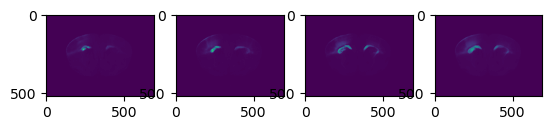

In [42]:
fig,axs = plt.subplots(1,4)
axs[0].imshow(images[0][50])
axs[1].imshow(images[1][50])
axs[2].imshow(images[2][50])
axs[3].imshow(im_mean[50])
